In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction')  

from extraction import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=10)

x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=10)



In [3]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=20)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['x_skewness'] = [stats.skew(x) for x in x_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:103: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['y_skewness'] = [stats.skew(y) for y in y_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['z_skewness'] = [stats.skew(z) for z in z_list]
c:\Users\Admin\Desktop

In [4]:
features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]


features_test = features_test[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]


In [5]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
features_all = features
features_all_test= features_test
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
x_kurtosis      1112
x_skewness      1112
y_skewness       679
y_kurtosis       679
z_kurtosis       206
z_skewness       206
y_peak_count       0
z_pos_count        0
x_above_mean       0
y_above_mean       0
dtype: int64


In [6]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

🌲 Training Random Forest (optimized)...
🎯 Test Accuracy: 0.9938
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      2863
           2       0.98      1.00      0.99       805
           3       1.00      1.00      1.00      2417
           4       1.00      0.95      0.97       240

    accuracy                           0.99      6325
   macro avg       0.99      0.98      0.99      6325
weighted avg       0.99      0.99      0.99      6325



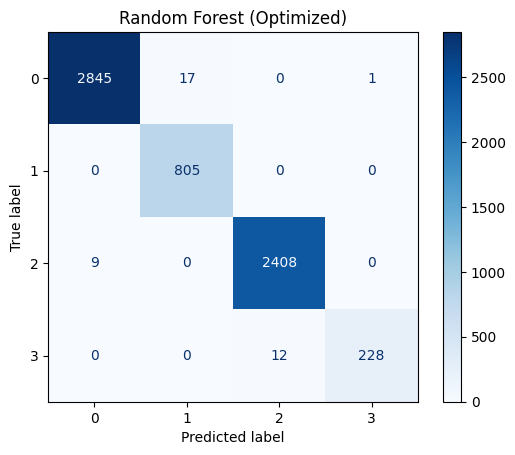

In [7]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean              0.013950
y_mean              0.591800
z_mean              0.731450
x_std               0.100172
y_std               0.067900
z_std               0.045301
x_aad               0.086525
y_aad               0.054400
z_aad               0.036475
x_median           -0.041000
y_median            0.626000
z_median            0.709000
x_mad               0.002000
y_mad               0.003000
z_mad               0.003000
x_IQR               0.055500
y_IQR               0.016000
z_IQR               0.012750
x_neg_count        15.000000
y_neg_count         0.000000
z_neg_count         0.000000
x_pos_count         5.000000
y_pos_count        20.000000
z_pos_count        20.000000
x_above_mean        5.000000
y_above_mean       15.000000
z_above_mean        5.000000
x_peak_count        3.000000
y_peak_count        4.000000
z_peak_count        4.000000
x_skewness          1.158828
y_skewness       

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


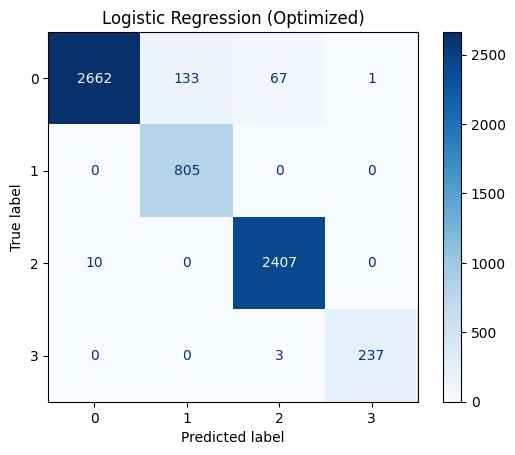

In [8]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

💡 Training SVM (optimized)...
🎯 Test Accuracy: 0.9393
              precision    recall  f1-score   support

           1       1.00      0.87      0.93      2863
           2       0.84      1.00      0.91       805
           3       0.92      1.00      0.96      2417
           4       1.00      0.99      0.99       240

    accuracy                           0.94      6325
   macro avg       0.94      0.96      0.95      6325
weighted avg       0.95      0.94      0.94      6325



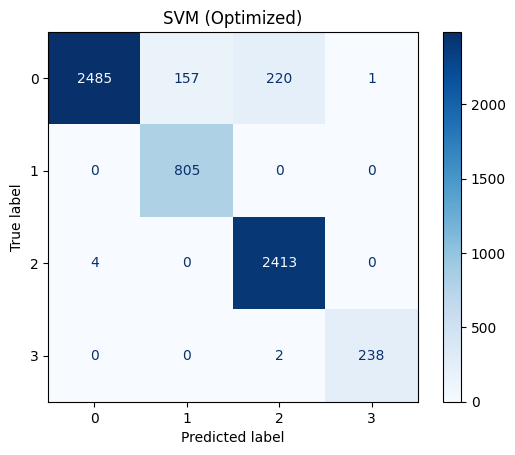

In [9]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

🔥 Training Gradient Boosting (optimized)...
🎯 Test Accuracy: 0.9968
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00       805
           3       1.00      1.00      1.00      2417
           4       1.00      0.97      0.99       240

    accuracy                           1.00      6325
   macro avg       1.00      0.99      0.99      6325
weighted avg       1.00      1.00      1.00      6325



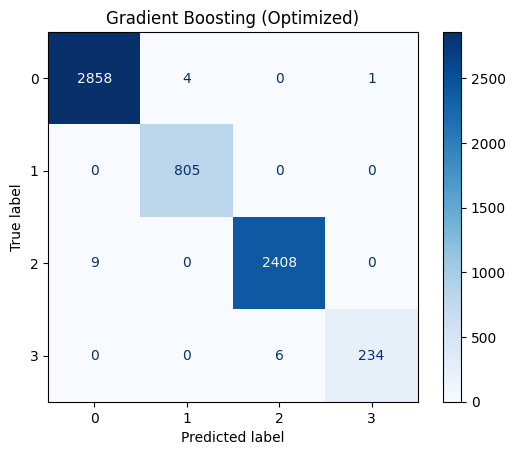

In [10]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


In [11]:
from optimation import get_model_size_kb

get_model_size_kb(modelRF, None, "RandomForest")
get_model_size_kb(modelLR, scalerLr, "LogisticRegression")
get_model_size_kb(modelSVM, scalerSVM, "SVM")
get_model_size_kb(modelGB, None, "GradientBoosting")

📦 RandomForest: Model = 86.73 KB | Scaler = 0.00 KB | Total = 86.73 KB
🌲  → Tổng số nút trong mô hình cây: 814
----------------------------------------------------------------------
📦 LogisticRegression: Model = 2.18 KB | Scaler = 2.45 KB | Total = 4.63 KB
🔢  → Số tham số huấn luyện: 168
----------------------------------------------------------------------
📦 SVM: Model = 49.28 KB | Scaler = 2.45 KB | Total = 51.73 KB
🔢  → Số tham số huấn luyện: 252
----------------------------------------------------------------------
📦 GradientBoosting: Model = 135.31 KB | Scaler = 0.00 KB | Total = 135.31 KB
🌲  → Tổng số nút trong mô hình cây: 1192
----------------------------------------------------------------------


135.3095703125